# Simulation of atmospheric transparency at OHP

- according data in MERRA2
- libradtran


In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [16]:
from astropy.io import fits

In [17]:
import libsimulateTranspOHPScattAbsAer as atmsim

In [18]:
z_airmass=1.0

# Winter

In [19]:
pwv_w=10.2
o3_w=370.1
P_w=932.8
aer_w=0

In [20]:
pwv_s=25.1
o3_s=318.1
P_s=938.9
aer_s=0

In [21]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_w,o3_w,aer_w,P_w,'mw') 

In [22]:
fullfilename=os.path.join(path,file)

In [23]:
data=np.loadtxt(fullfilename)

In [24]:
wl_w=data[:,0]

In [25]:
WL=wl_w
NB_atm_DATA=len(WL)

In [26]:
atm_w=data[:,1]

In [27]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_s,o3_s,aer_s,P_s,'ms') 

In [28]:
fullfilename=os.path.join(path,file)

In [29]:
data=np.loadtxt(fullfilename)

In [30]:
wl_s=data[:,0]

In [31]:
WL=wl_s
NB_atm_DATA=len(WL)

In [32]:
atm_s=data[:,1]

Text(0.5,1,'Average atm transp at OHP at airmass=1.0, year=2018')

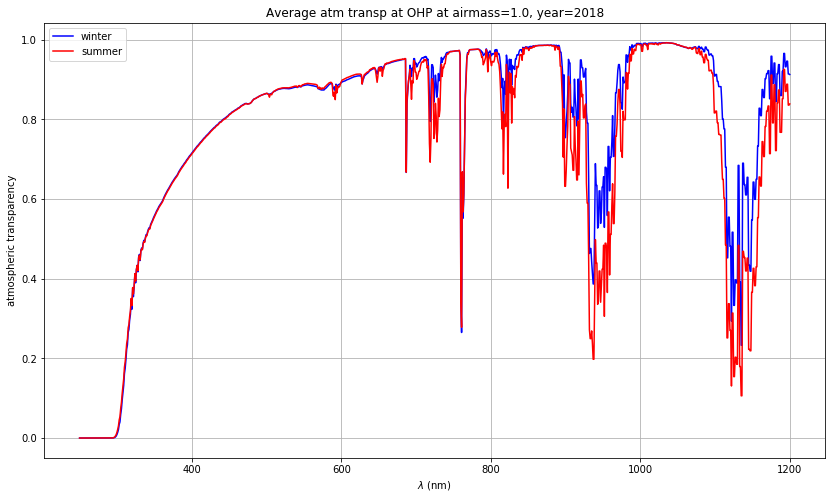

In [38]:
title="Average atm transp at OHP at airmass={}, year={}".format(z_airmass,"2018")
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w,'b-',label="winter")
plt.plot(wl_s,atm_s,'r-',label="summer")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")
plt.grid()
plt.legend()
plt.title(title)

/Users/dagoret/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


(0.9, 1.1)

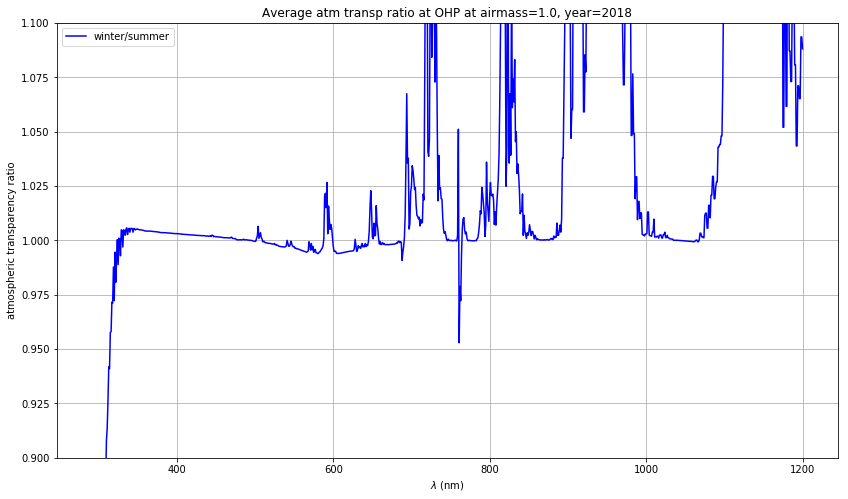

In [40]:
title="Average atm transp ratio at OHP at airmass={}, year={}".format(z_airmass,"2018")
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w/atm_s,'b-',label="winter/summer")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.grid()
plt.legend()
plt.title(title)
plt.ylim(0.9,1.1)